In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [3]:
import pandas as pd

# Load the employee data from the specified path
data = pd.read_csv("C:\\Users\\82044\\Downloads\\employee.csv")

# Display the first few rows to confirm it loaded correctly
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [4]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [5]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [6]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [7]:
#Handling null values in categorical columns
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


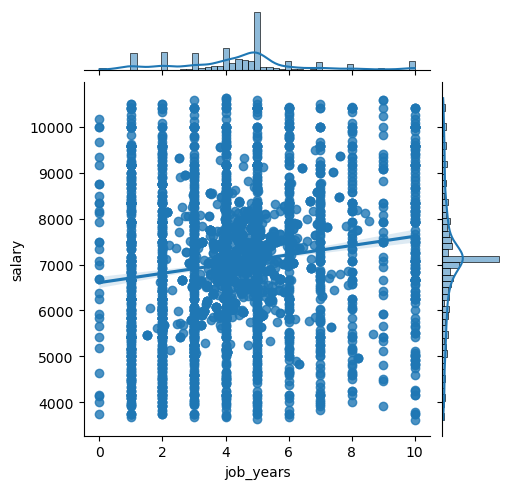

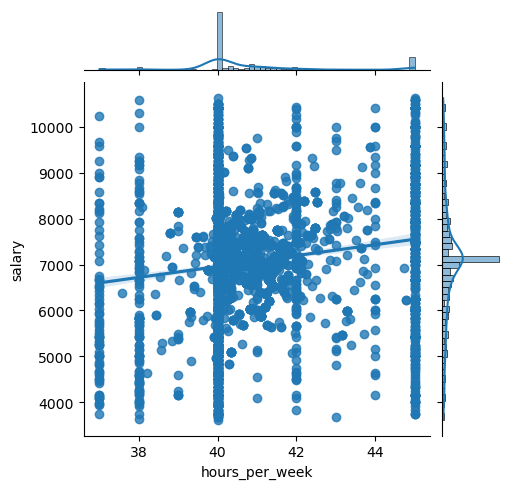

In [9]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

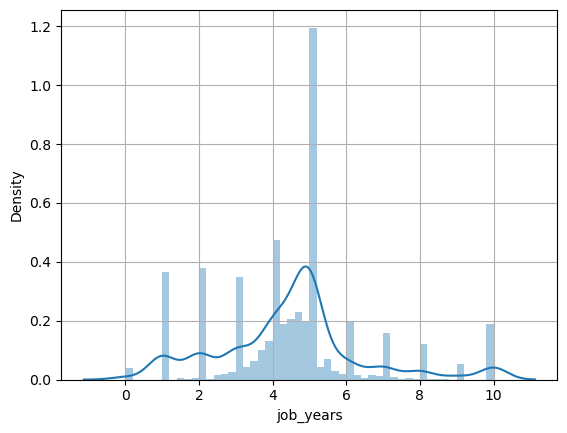

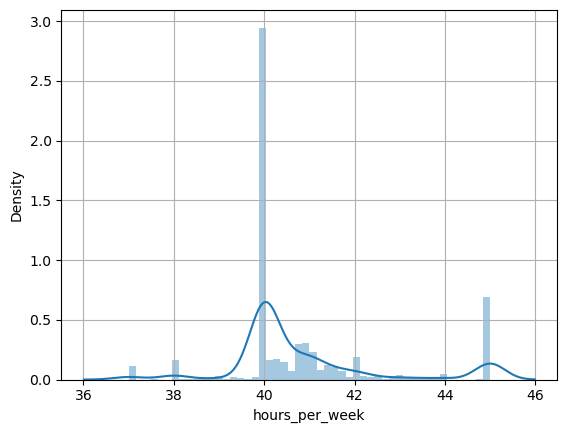

In [10]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

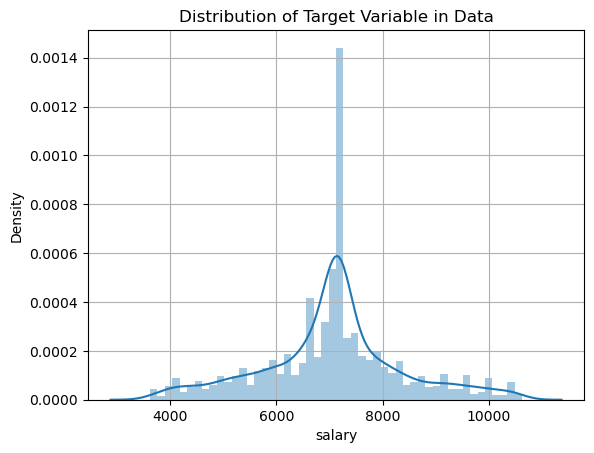

max: 10625.0
min: 3622.0


In [11]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

In [12]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [13]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [14]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [15]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
final_data.shape

(4261, 25)

In [16]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [17]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 24)
Validation Set Dimensions: (853, 24)


## Preprossessing Data

In [18]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [19]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [20]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
181,-1.220347,0,-0.474987,-0.618835,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4167,-0.980398,0,0.113122,1.814380,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4242,-1.220347,0,0.093071,-0.618835,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2059,0.772077,0,2.365302,-0.010531,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2965,-1.718453,1,-0.474987,-0.618835,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,-1.220347,1,-0.474987,-0.618835,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1342,0.273971,0,-0.474987,-0.010531,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2404,0.273971,0,-0.474987,-0.618835,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2644,0.273971,1,-0.474987,1.814380,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [21]:
#Fitting a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
reg.coef_

array([  169.82335984,    59.22624544,   210.78986677,   220.32176998,
          82.26406135,   -16.80247585,   252.093393  , -2247.67105086,
        1091.76589394,   819.57499524,   776.86524749,   498.39299629,
         926.35192884,   806.08949998,    93.71850221,   943.47917319,
         716.35319106,  3520.94906959,   340.89722186,  -218.57257998,
         209.41020292,   166.03390375,  -248.97618645,  -175.36748792])

In [23]:
reg.intercept_

6164.6655794316075

In [24]:
# Normalized MSE (Dividing by mean)
mean_squared_error(y_train,reg.predict(X_train))/np.mean(y_train)

214.1616379351724

In [25]:
# Predict on the test data
y_pred = reg.predict(X_test)

In [26]:
#Evaluate the model on test data
mse = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 13100.394915293791


## Calculate R-squared

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared on test data:", r2)


R-squared on test data: -57.7593022301697


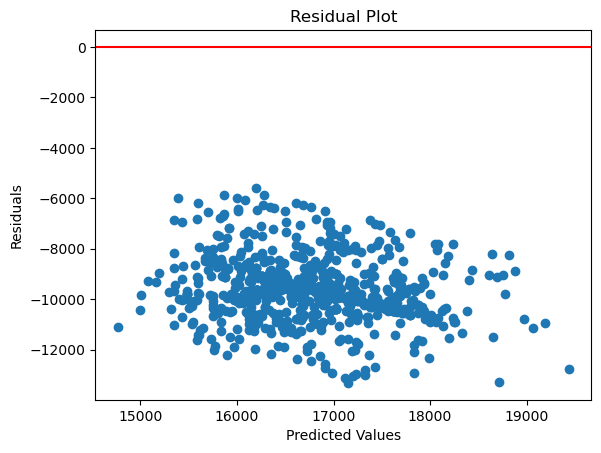

In [32]:
## determine how much of the variance in the target variable is explained by model.
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Feature Importance Analysis

In [33]:

## Higher absolute values of coefficients indicate stronger influence on the target variable.
feature_importance = pd.Series(reg.coef_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print("Feature Importance:\n", feature_importance)


Feature Importance:
 job_title_Sr Consultant                                         3520.949070
job_title_Architect                                             1091.765894
job_title_Principal database engineer                            943.479173
job_title_Engineer                                               926.351929
job_title_DBA                                                    819.574995
job_title_Manager                                                806.089500
job_title_Data Scientist                                         776.865247
job_title_Sales                                                  716.353191
job_title_Developer                                              498.392996
education_Bachelors (4 years)                                    340.897222
employment_status_Part time                                      252.093393
telecommute_days_per_week                                        220.321770
hours_per_week                                                   21

In [34]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Average Cross-Validation MSE:", -cv_scores.mean())


Average Cross-Validation MSE: 1539721.123805841


In [39]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Average Ridge Cross-Validation MSE:", -ridge_cv_scores.mean())

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso_cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Average Lasso Cross-Validation MSE:", -lasso_cv_scores.mean())

Average Ridge Cross-Validation MSE: 1539372.1337392342
Average Lasso Cross-Validation MSE: 1539554.305847539


## Since linear regression models (including Ridge and Lasso) may not capture complex relationships,we may consider trying other algorithms like Random Forest, Gradient Boosting, or Support Vector Machines.